In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns
from IPython.display import display
pd.set_option('display.max_columns', None)
from sklearn.metrics import confusion_matrix,recall_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay
)

In [2]:
df = pd.read_csv(r"C:\Users\Admin\Documents\ENSSEA\ML\PY-TEST\digital_diet_mental_health.csv")

In [3]:
df.head()   

,user_id,age,gender,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,entertainment_hours,gaming_hours,sleep_duration_hours,sleep_quality,mood_rating,stress_level,physical_activity_hours_per_week,location_type,mental_health_score,uses_wellness_apps,eats_healthy,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day
0,user_1,51,Female,4.8,3.4,1.3,1.6,1.6,4.1,2.0,1.0,1.7,6.6,6,6,10,0.7,Urban,32,1,1,125.2,13,15,4.0
1,user_2,64,Male,3.9,3.5,1.8,0.9,2.0,2.7,3.1,1.0,1.5,4.5,7,5,6,4.3,Suburban,75,0,1,150.4,19,18,6.5
2,user_3,41,Other,10.5,2.1,2.6,0.7,2.2,3.0,2.8,4.1,1.7,7.1,9,5,5,3.1,Suburban,22,0,0,187.9,7,3,6.9
3,user_4,27,Other,8.8,0.0,0.0,0.7,2.5,3.3,1.6,1.3,0.4,5.1,9,10,5,0.0,Rural,22,0,1,73.6,7,2,4.8
4,user_5,55,Male,5.9,1.7,1.1,1.5,1.6,1.1,3.6,0.8,0.8,7.4,2,8,7,3.0,Urban,64,1,1,217.5,8,10,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   user_id                           2000 non-null   object 
 1   age                               2000 non-null   int64  
 2   gender                            2000 non-null   object 
 3   daily_screen_time_hours           2000 non-null   float64
 4   phone_usage_hours                 2000 non-null   float64
 5   laptop_usage_hours                2000 non-null   float64
 6   tablet_usage_hours                2000 non-null   float64
 7   tv_usage_hours                    2000 non-null   float64
 8   social_media_hours                2000 non-null   float64
 9   work_related_hours                2000 non-null   float64
 10  entertainment_hours               2000 non-null   float64
 11  gaming_hours                      2000 non-null   float64
 12  sleep_

In [5]:
df.describe()

,age,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,entertainment_hours,gaming_hours,sleep_duration_hours,sleep_quality,mood_rating,stress_level,physical_activity_hours_per_week,mental_health_score,uses_wellness_apps,eats_healthy,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000
mean,38.805500,6.025600,3.023700,1.999950,0.995650,1.503700,2.039200,2.010250,2.46735,1.2795,6.537550,5.567000,5.591000,5.541500,3.087150,49.650500,0.387500,0.507500,148.07970,9.887500,10.04900,10.753750
std,14.929203,1.974123,1.449399,0.997949,0.492714,0.959003,1.133435,1.116111,1.23686,0.8945,1.203856,2.826217,2.899814,2.885731,1.885258,17.546717,0.487301,0.500069,48.86066,6.027853,6.05334,7.340269
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0000,3.000000,1.000000,1.000000,1.000000,0.000000,20.000000,0.000000,0.000000,0.80000,0.000000,0.00000,0.000000
25%,26.000000,4.700000,2.000000,1.300000,0.600000,0.800000,1.200000,1.200000,1.60000,0.6000,5.700000,3.000000,3.000000,3.000000,1.600000,35.000000,0.000000,0.000000,113.90000,5.000000,5.00000,4.900000
50%,39.000000,6.000000,3.000000,2.000000,1.000000,1.500000,2.000000,2.000000,2.40000,1.2000,6.600000,6.000000,6.000000,6.000000,3.000000,49.000000,0.000000,1.000000,147.45000,10.000000,10.00000,10.400000
75%,51.000000,7.325000,4.000000,2.700000,1.300000,2.200000,2.800000,2.800000,3.30000,1.9000,7.400000,8.000000,8.000000,8.000000,4.400000,64.250000,1.000000,1.000000,180.70000,15.000000,15.00000,15.800000
max,64.000000,13.300000,8.400000,5.600000,2.500000,4.700000,5.800000,5.900000,6.80000,4.0000,10.000000,10.000000,10.000000,10.000000,9.700000,80.000000,1.000000,1.000000,364.90000,20.000000,20.00000,36.400000


#### i use chat gpt to see how can i make the matrix more clear , with my own code i cant see allcolumns

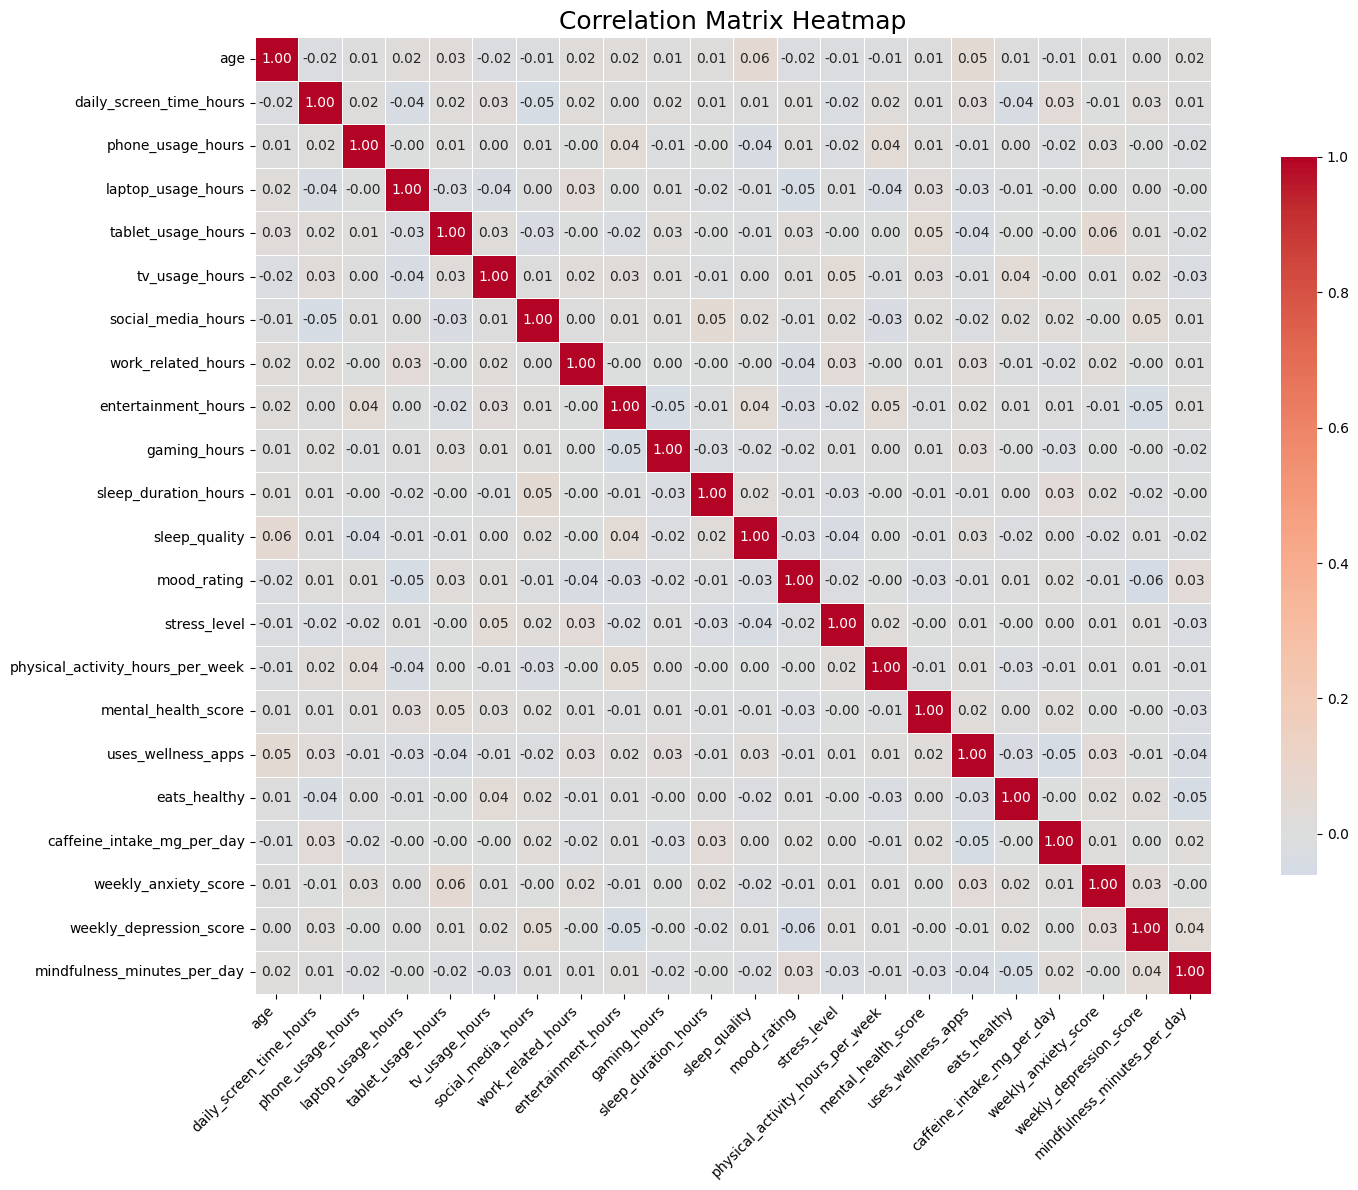

In [6]:
df_numeric = df.select_dtypes(include=[np.number])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, square=True,
            linewidths=0.5, cbar_kws={"shrink": .75})
plt.title("Correlation Matrix Heatmap", fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


A threshold of 33 is meaningful if it aligns with clinical or research standards, as it effectively separates scores into "lower mental health concerns" (below 33) and "more significant issues" (33 and above). This ensures the binary categorization reflects validated distinctions, making it relevant for analysis or decision-making.

In [7]:

def categorize_mental_health(mental_health_score):
  if 0 <= mental_health_score < 33:
    return '0'
  elif 33 <= mental_health_score < 100:
    return '1'

df['MentalHealthbinary'] = df['mental_health_score'].apply(categorize_mental_health)

In [8]:
df.groupby('MentalHealthbinary').count()

,user_id,age,gender,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,entertainment_hours,gaming_hours,sleep_duration_hours,sleep_quality,mood_rating,stress_level,physical_activity_hours_per_week,location_type,mental_health_score,uses_wellness_apps,eats_healthy,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day
MentalHealthbinary,,,,,,,,,,,,,,,,,,,,,,,,,
0,427,427,427,427,427,427,427,427,427,427,427,427,427,427,427,427,427,427,427,427,427,427,427,427,427
1,1573,1573,1573,1573,1573,1573,1573,1573,1573,1573,1573,1573,1573,1573,1573,1573,1573,1573,1573,1573,1573,1573,1573,1573,1573


In [9]:
df = df.drop(columns=['user_id', 'mental_health_score'])


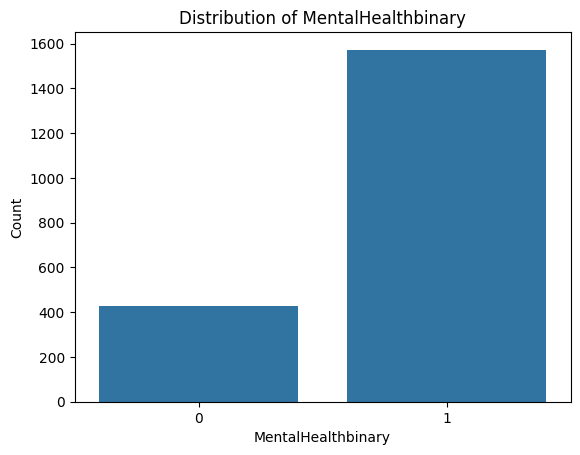

In [10]:
sns.countplot(x='MentalHealthbinary', data=df)
plt.title('Distribution of MentalHealthbinary')
plt.xlabel('MentalHealthbinary')
plt.ylabel('Count')
plt.show()

In [11]:
categorical_cols=df.select_dtypes(include=['category']).columns


In [12]:
df['gender'] = df['gender'].replace({
    'Female': 0,
    'Male': 1,
    'Other': 2,
    })
df.drop(columns=['location_type'], inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6736\2044474885.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({


In [13]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE



X = df.drop(columns=['MentalHealthbinary'])
y = df['MentalHealthbinary']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

df_balanced = X_resampled.assign(MentalHealthbinary=y_resampled)

In [14]:
df_balanced.head()

,age,gender,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,entertainment_hours,gaming_hours,sleep_duration_hours,sleep_quality,mood_rating,stress_level,physical_activity_hours_per_week,uses_wellness_apps,eats_healthy,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day,MentalHealthbinary
0,51,0,4.8,3.4,1.3,1.6,1.6,4.1,2.0,1.0,1.7,6.6,6,6,10,0.7,1,1,125.2,13,15,4.0,0
1,64,1,3.9,3.5,1.8,0.9,2.0,2.7,3.1,1.0,1.5,4.5,7,5,6,4.3,0,1,150.4,19,18,6.5,1
2,41,2,10.5,2.1,2.6,0.7,2.2,3.0,2.8,4.1,1.7,7.1,9,5,5,3.1,0,0,187.9,7,3,6.9,0
3,27,2,8.8,0.0,0.0,0.7,2.5,3.3,1.6,1.3,0.4,5.1,9,10,5,0.0,0,1,73.6,7,2,4.8,0
4,55,1,5.9,1.7,1.1,1.5,1.6,1.1,3.6,0.8,0.8,7.4,2,8,7,3.0,1,1,217.5,8,10,0.0,1


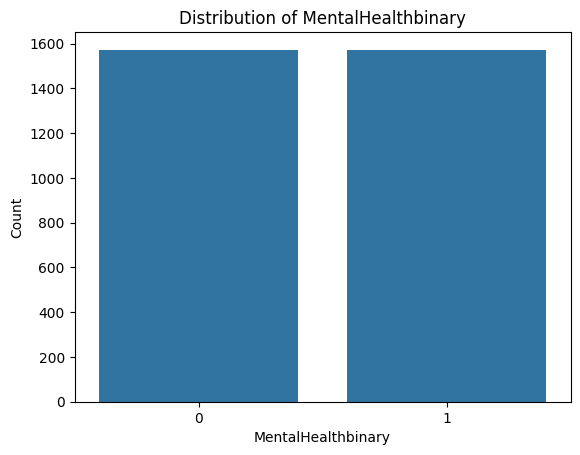

In [15]:
sns.countplot(x='MentalHealthbinary', data=df_balanced)
plt.title('Distribution of MentalHealthbinary')
plt.xlabel('MentalHealthbinary')
plt.ylabel('Count')
plt.show()

and the distrubition is good and balanced 

In [16]:
df_balanced.head()

,age,gender,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,entertainment_hours,gaming_hours,sleep_duration_hours,sleep_quality,mood_rating,stress_level,physical_activity_hours_per_week,uses_wellness_apps,eats_healthy,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day,MentalHealthbinary
0,51,0,4.8,3.4,1.3,1.6,1.6,4.1,2.0,1.0,1.7,6.6,6,6,10,0.7,1,1,125.2,13,15,4.0,0
1,64,1,3.9,3.5,1.8,0.9,2.0,2.7,3.1,1.0,1.5,4.5,7,5,6,4.3,0,1,150.4,19,18,6.5,1
2,41,2,10.5,2.1,2.6,0.7,2.2,3.0,2.8,4.1,1.7,7.1,9,5,5,3.1,0,0,187.9,7,3,6.9,0
3,27,2,8.8,0.0,0.0,0.7,2.5,3.3,1.6,1.3,0.4,5.1,9,10,5,0.0,0,1,73.6,7,2,4.8,0
4,55,1,5.9,1.7,1.1,1.5,1.6,1.1,3.6,0.8,0.8,7.4,2,8,7,3.0,1,1,217.5,8,10,0.0,1


In [17]:
df= df_balanced 

age                                 0
gender                              0
daily_screen_time_hours             0
phone_usage_hours                   0
laptop_usage_hours                  0
tablet_usage_hours                  0
tv_usage_hours                      0
social_media_hours                  0
work_related_hours                  0
entertainment_hours                 0
gaming_hours                        0
sleep_duration_hours                0
sleep_quality                       0
mood_rating                         0
stress_level                        0
physical_activity_hours_per_week    0
uses_wellness_apps                  0
eats_healthy                        0
caffeine_intake_mg_per_day          0
weekly_anxiety_score                0
weekly_depression_score             0
mindfulness_minutes_per_day         0
MentalHealthbinary                  0
dtype: int64


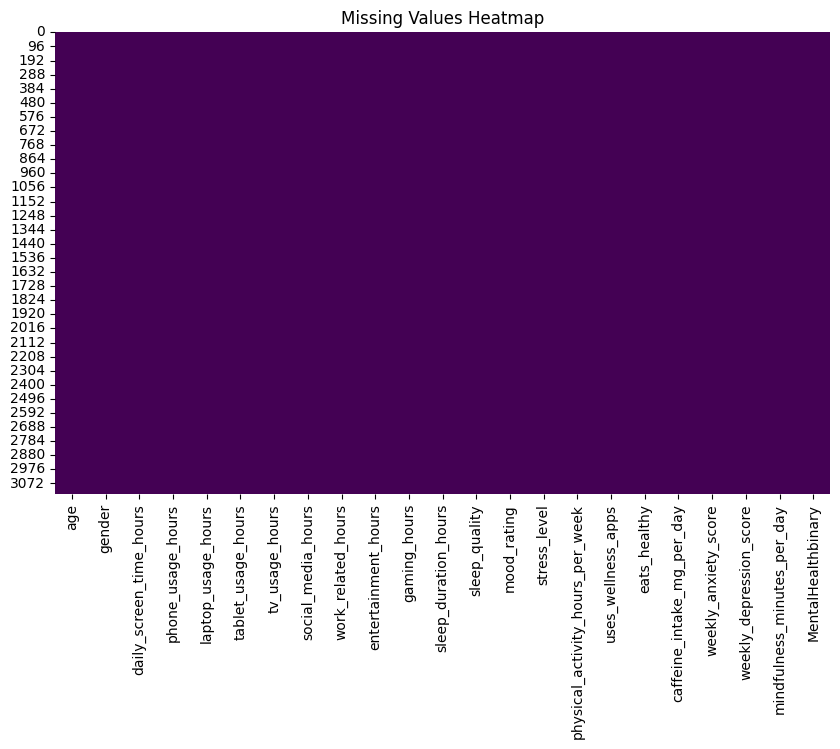

In [18]:

print(df.isnull().sum())
plt.figure(figsize=(10, 6))
sns.heatmap(df_balanced.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


EDA

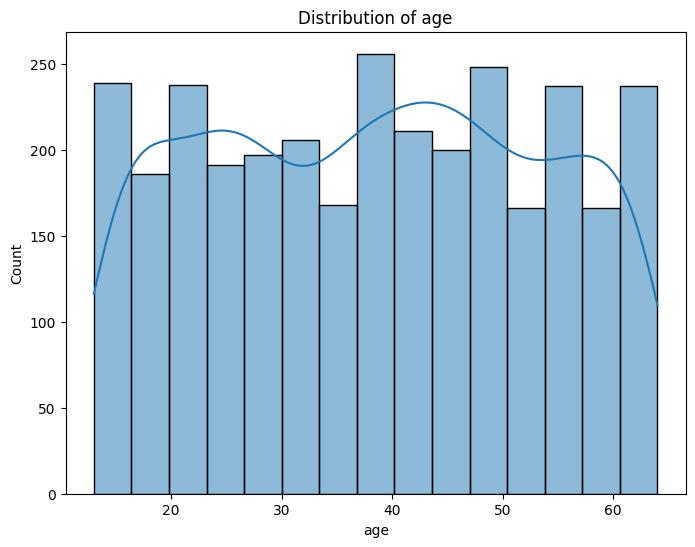

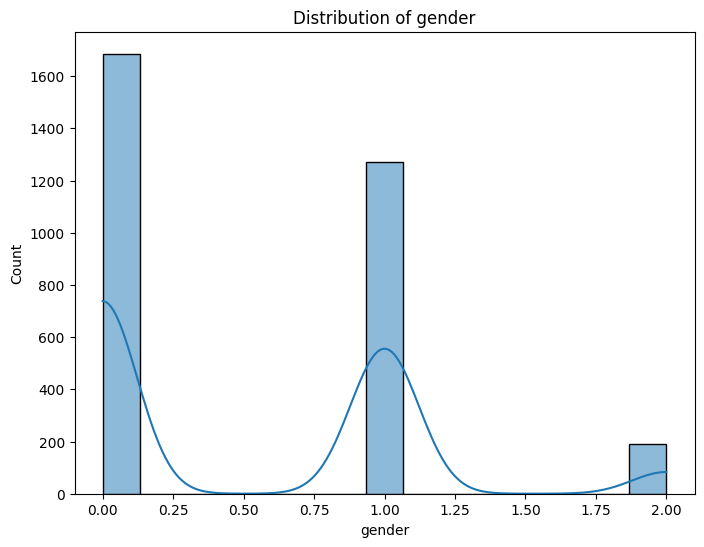

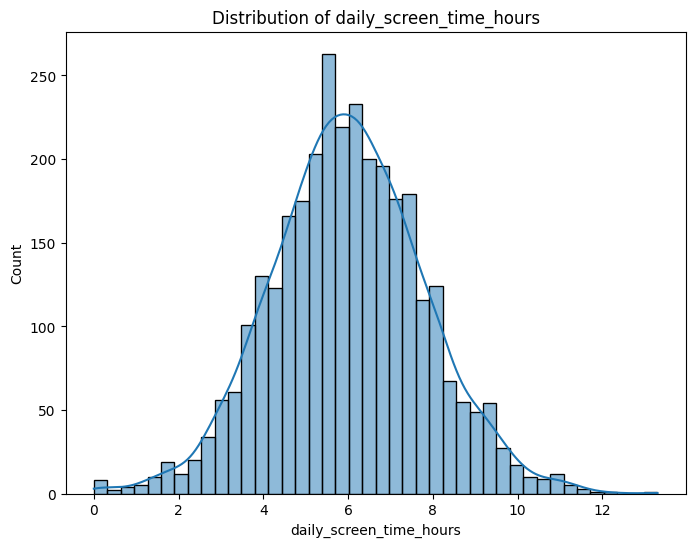

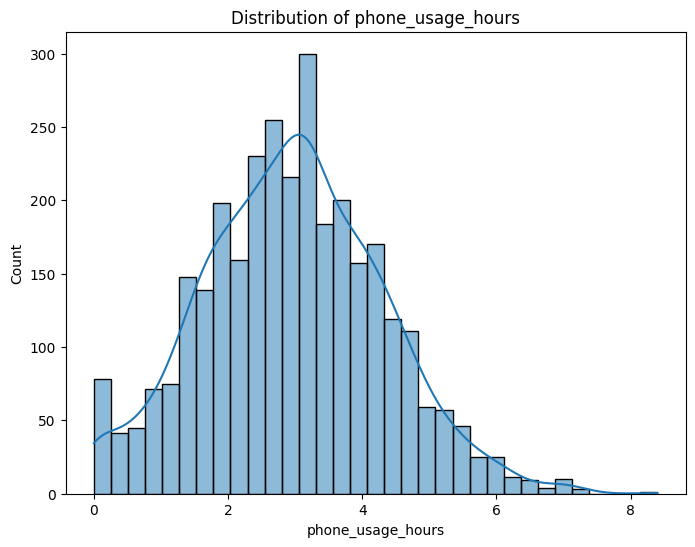

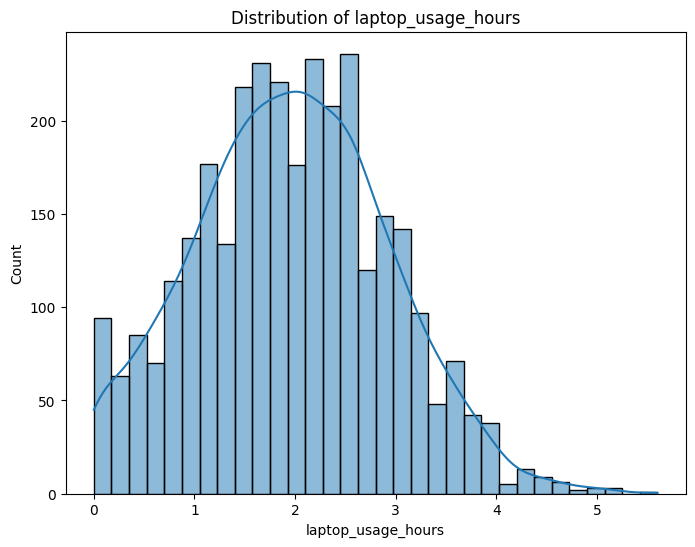

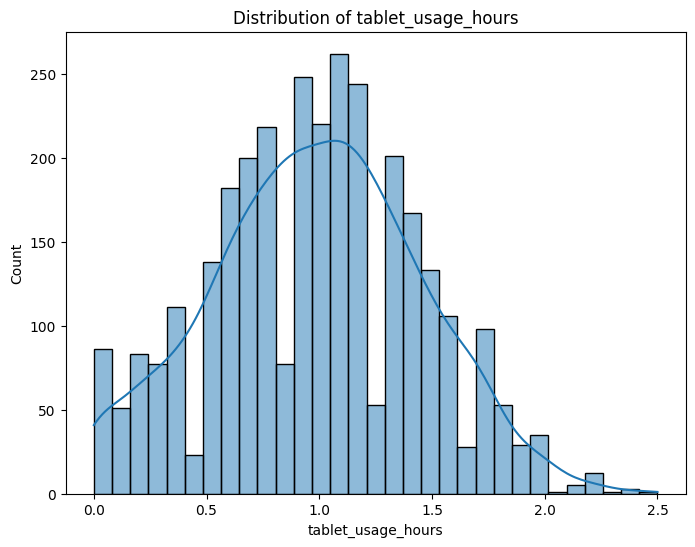

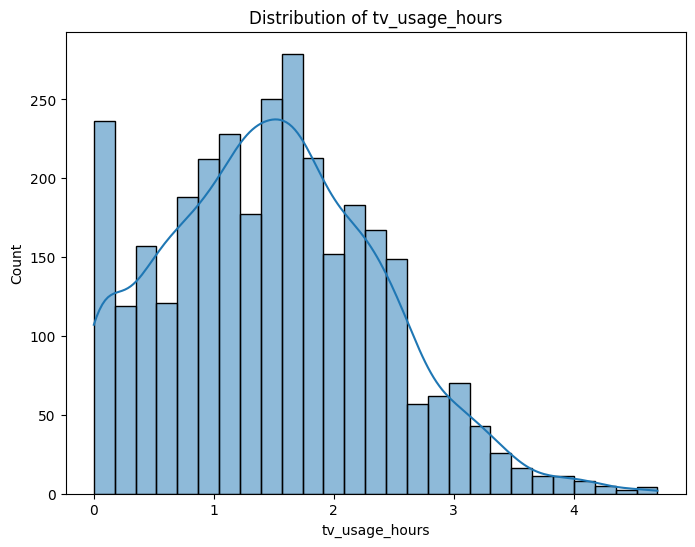

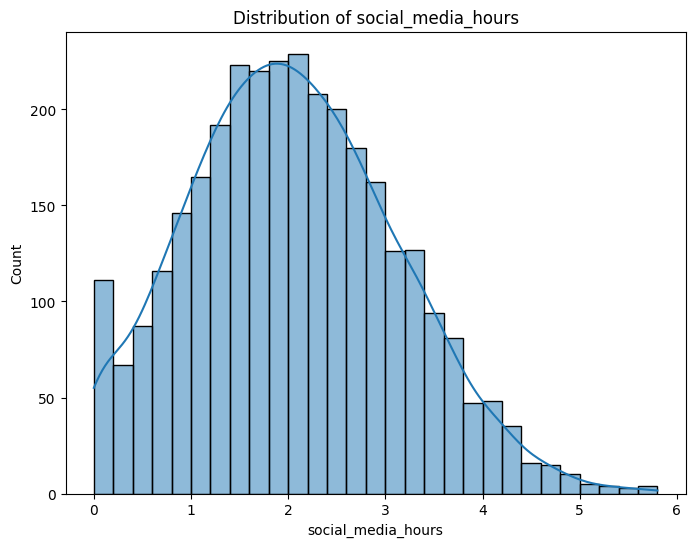

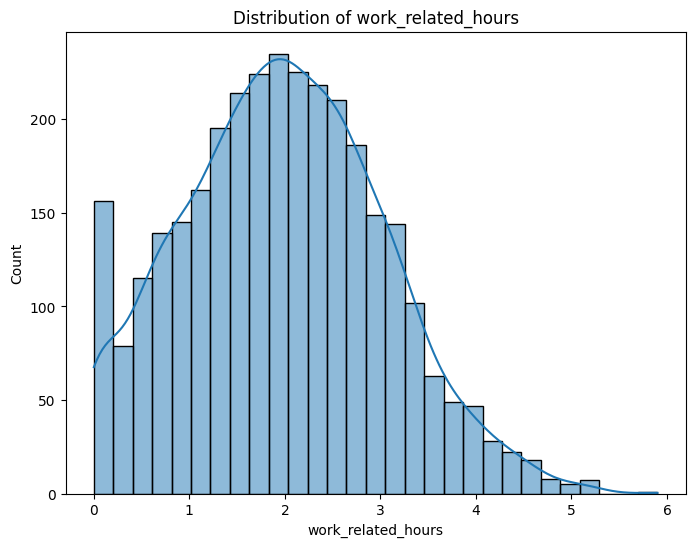

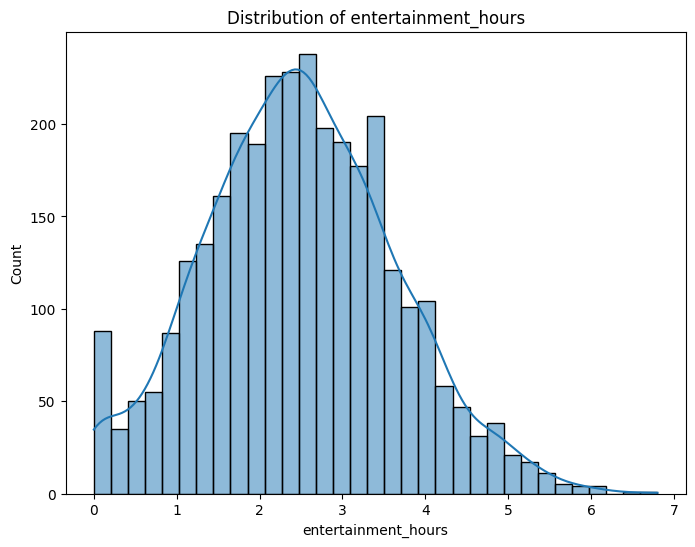

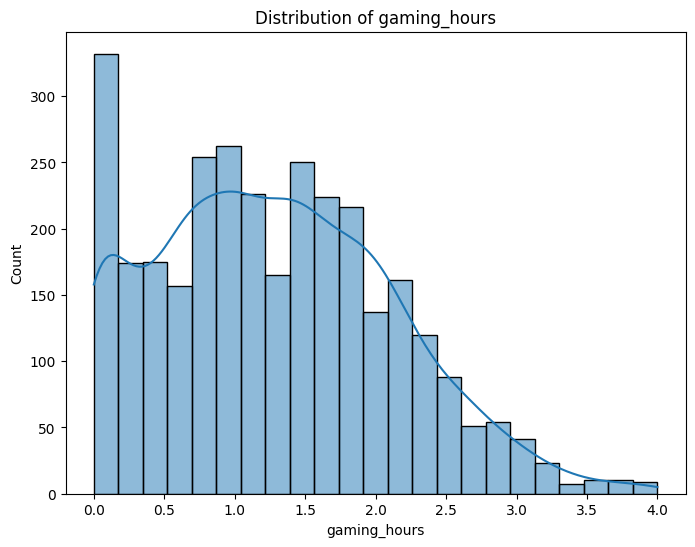

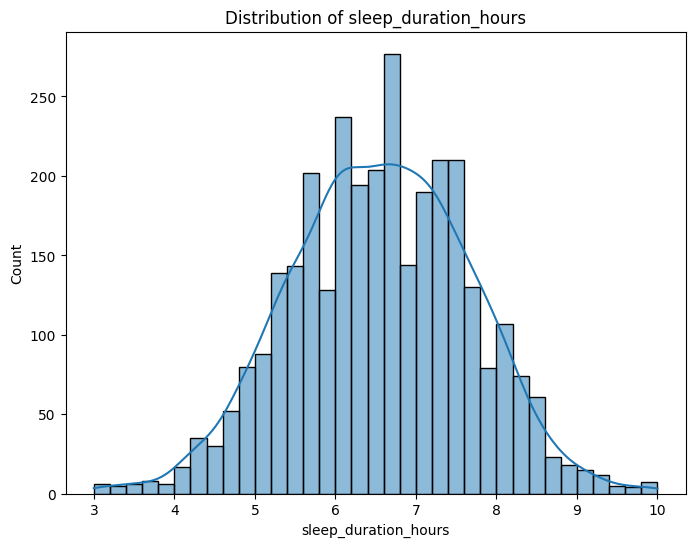

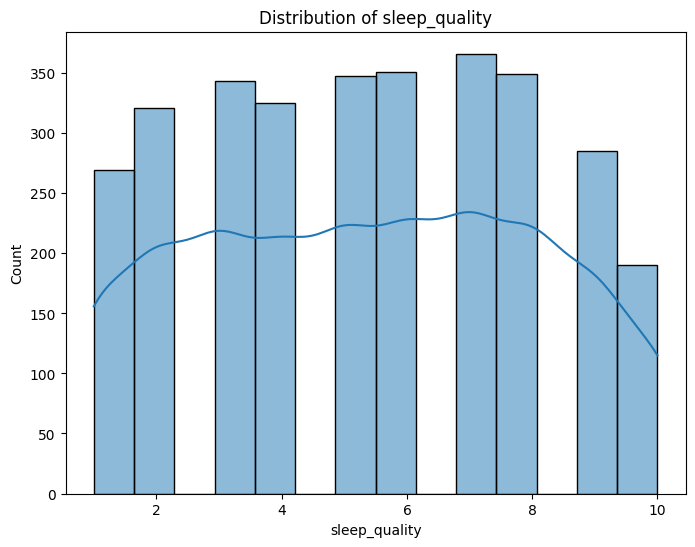

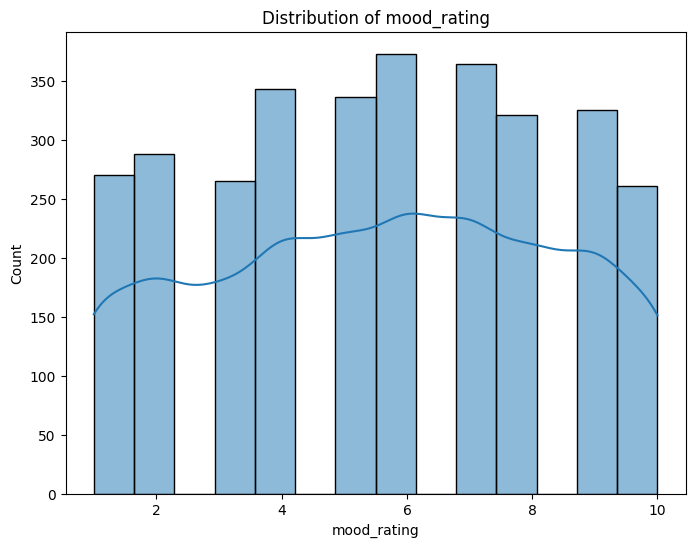

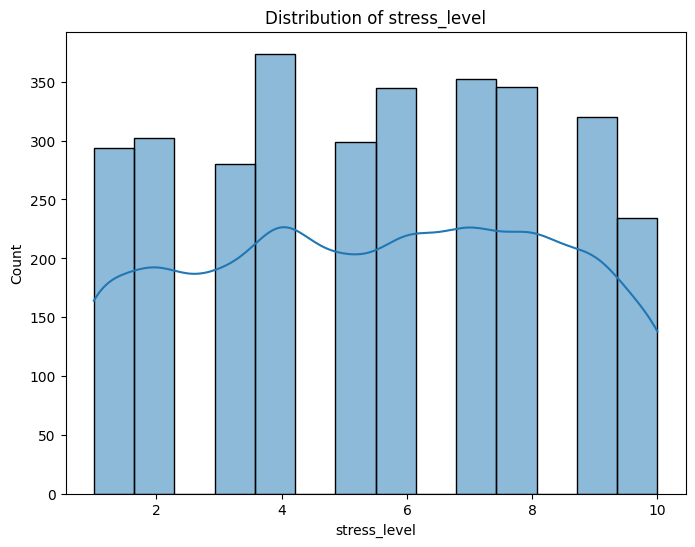

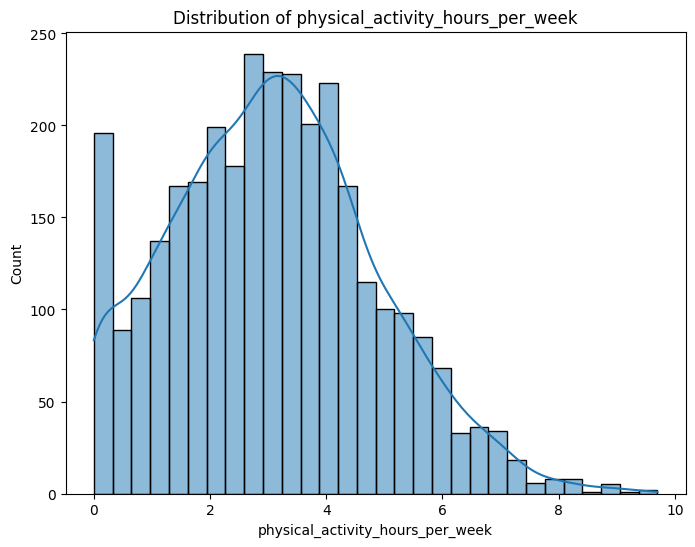

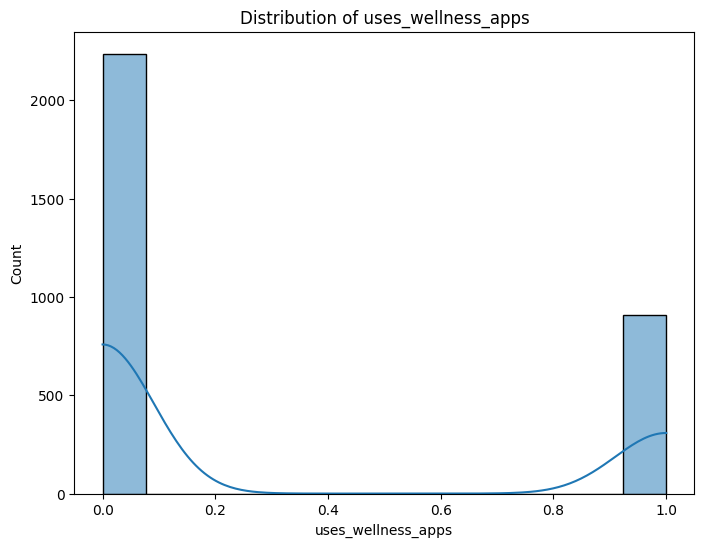

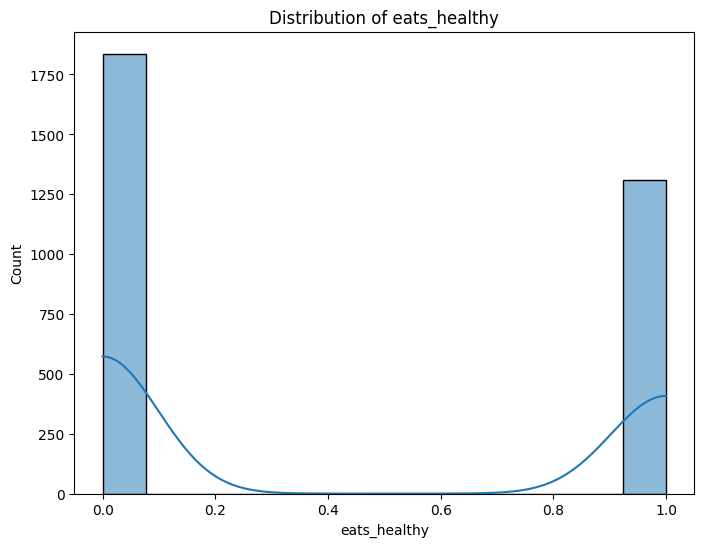

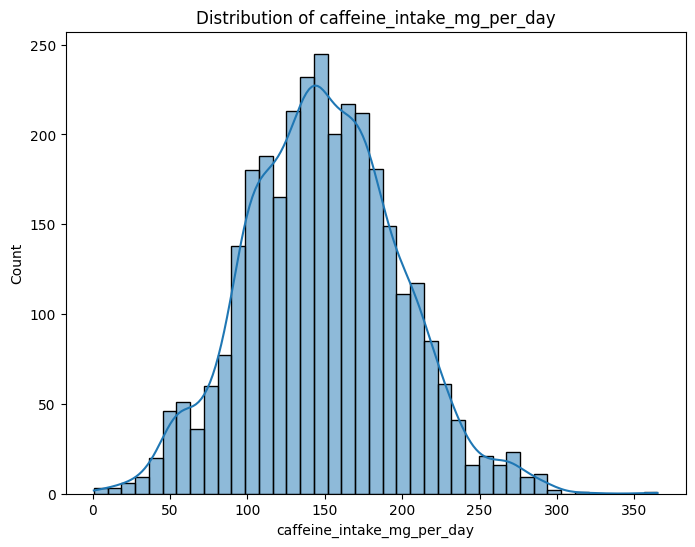

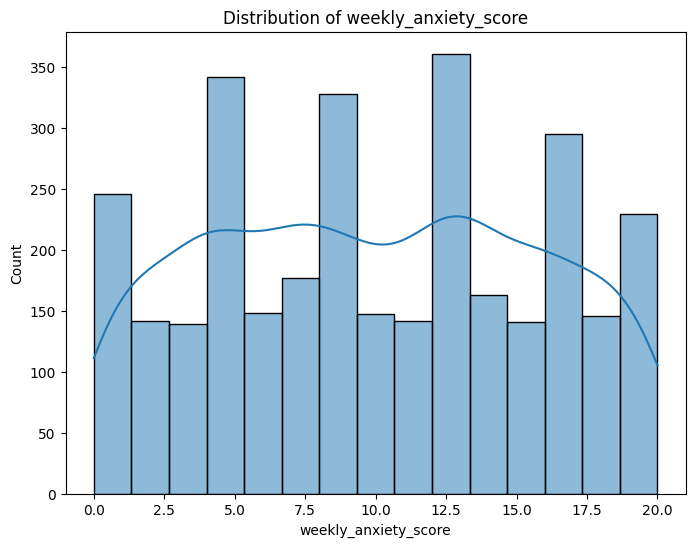

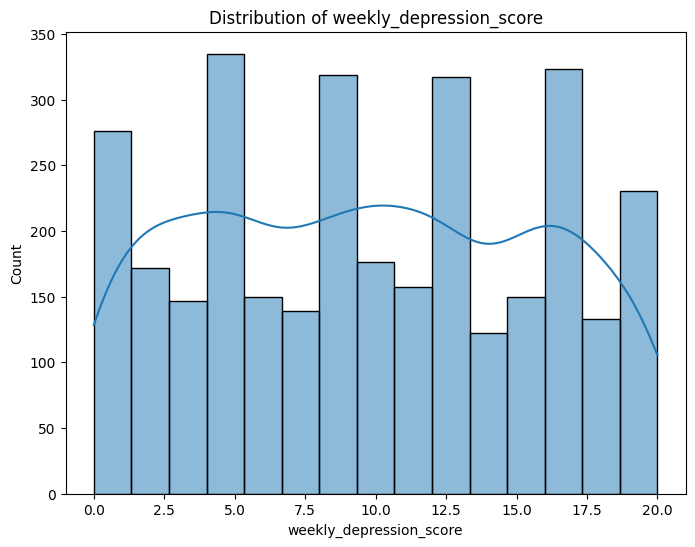

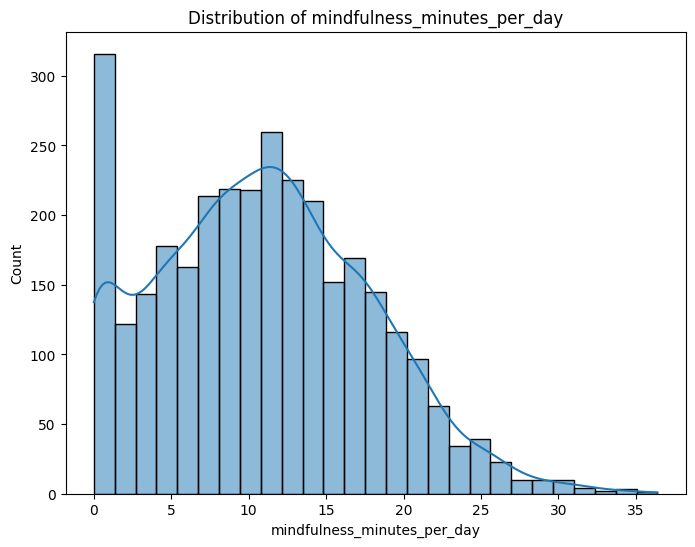

In [19]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

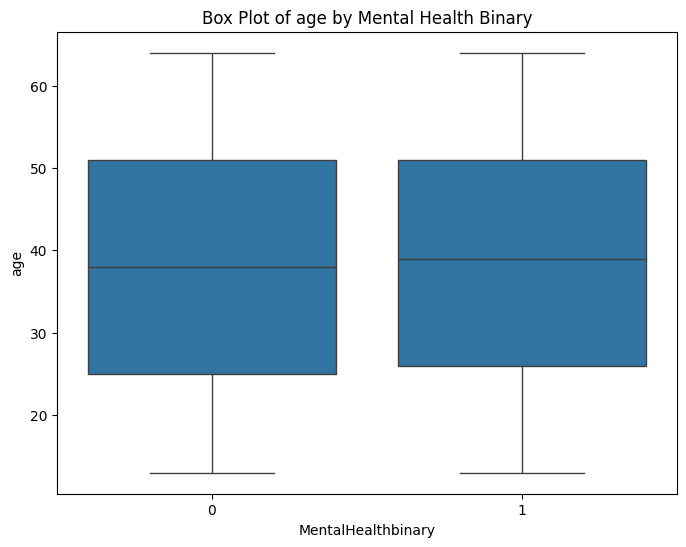

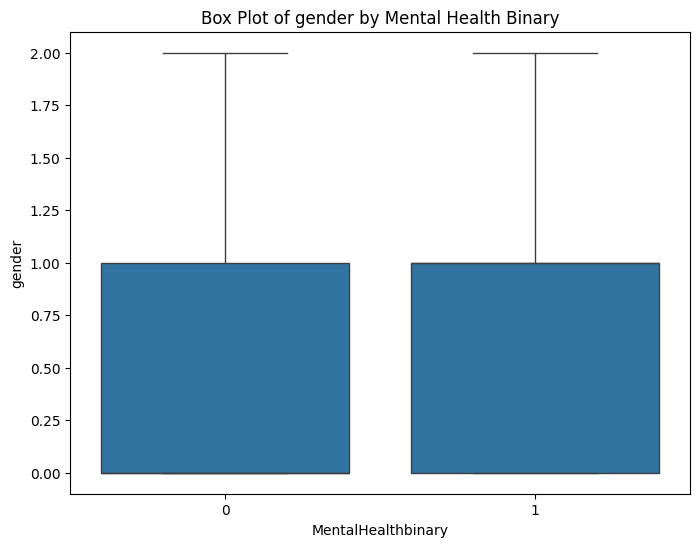

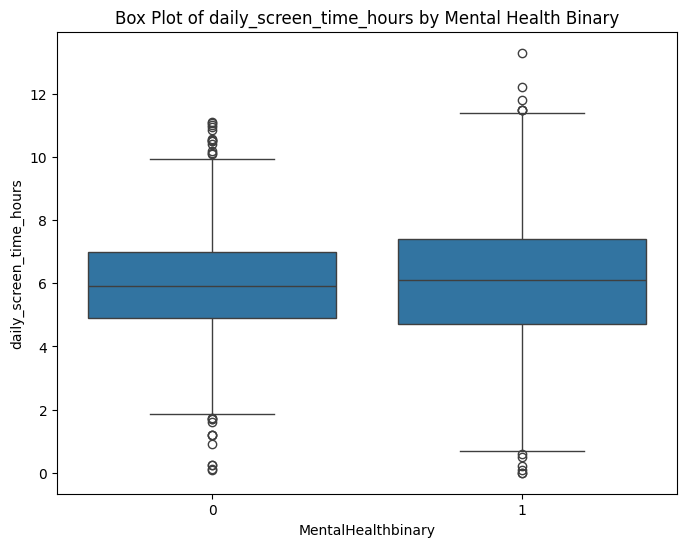

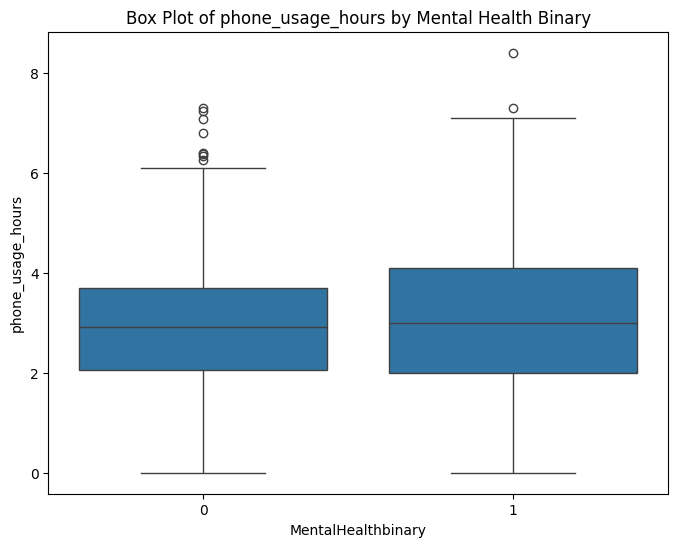

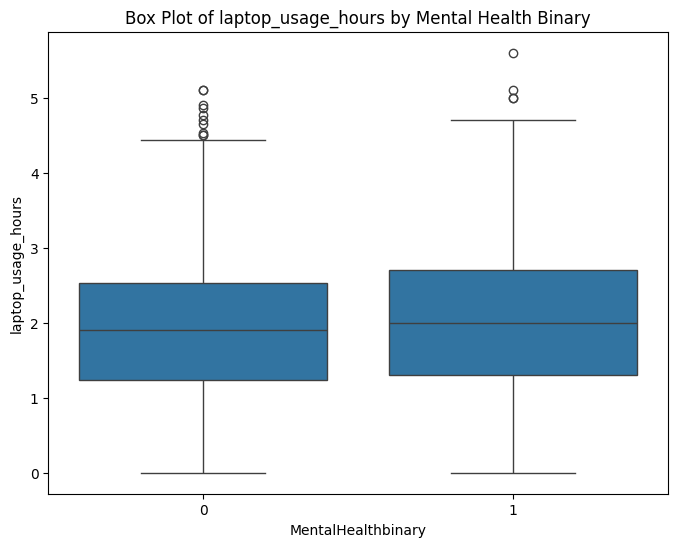

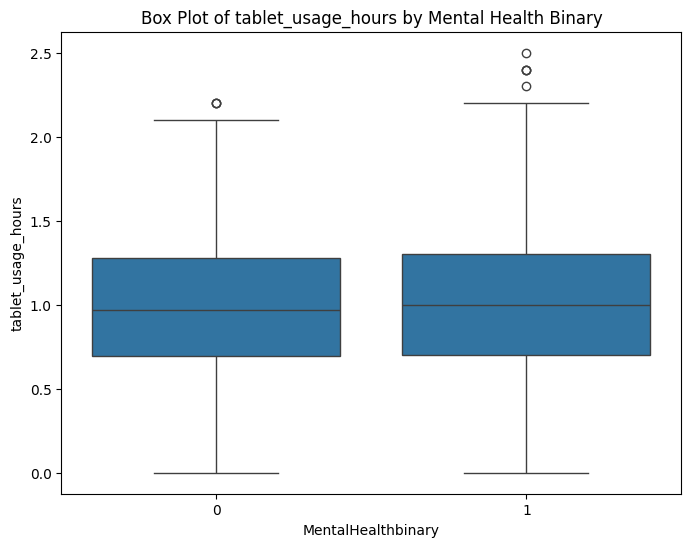

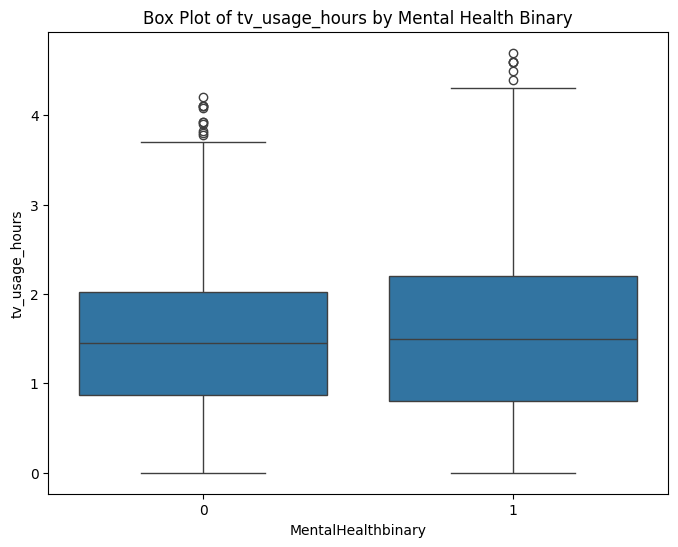

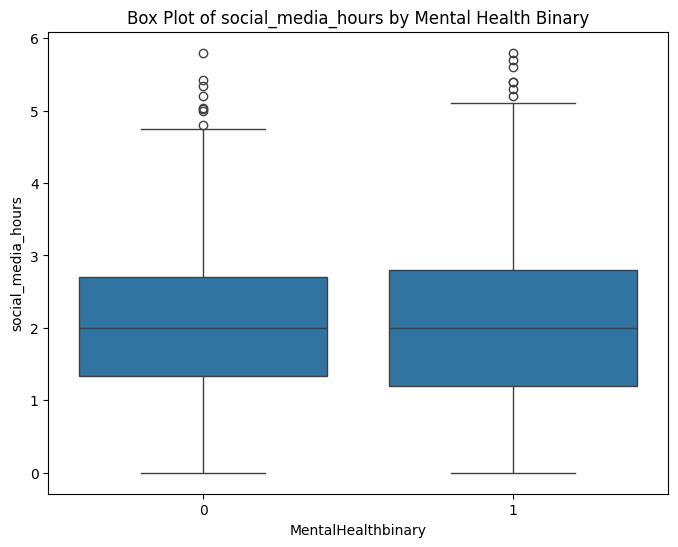

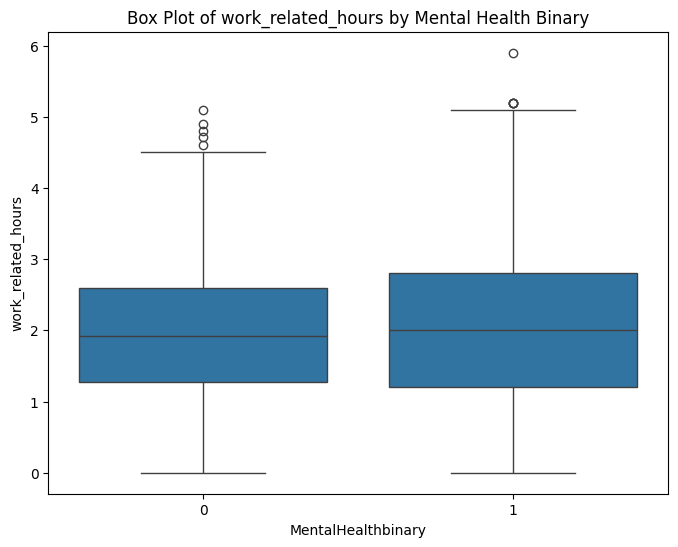

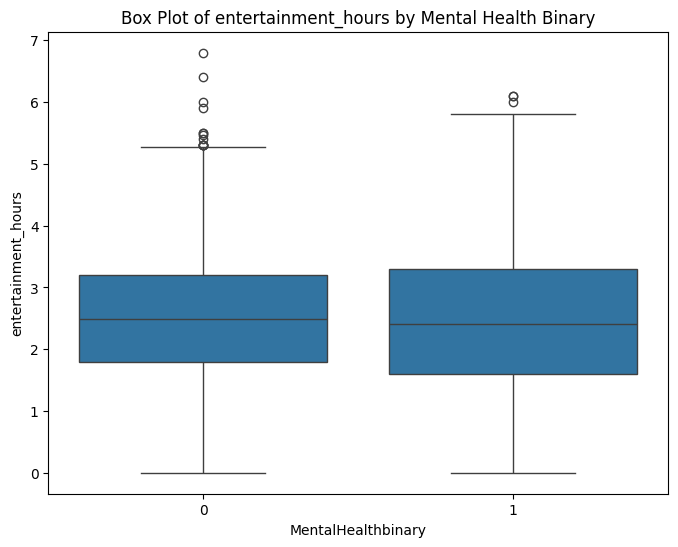

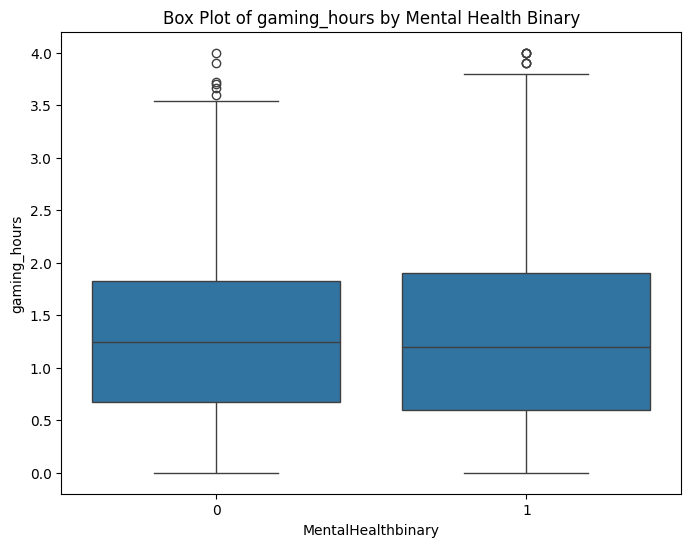

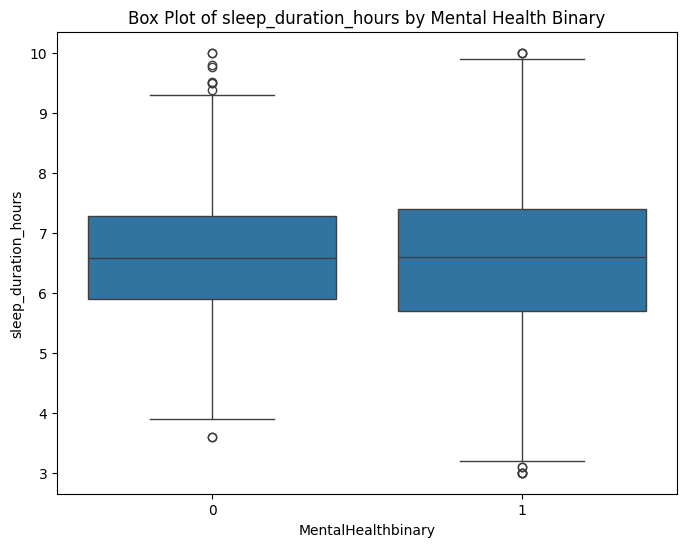

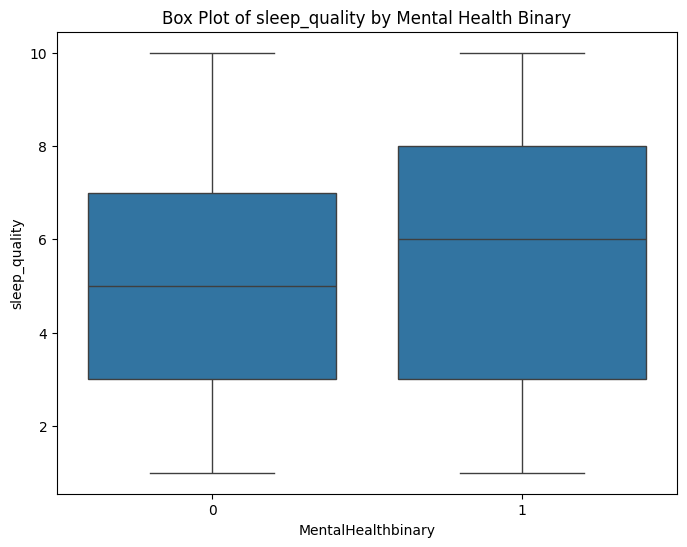

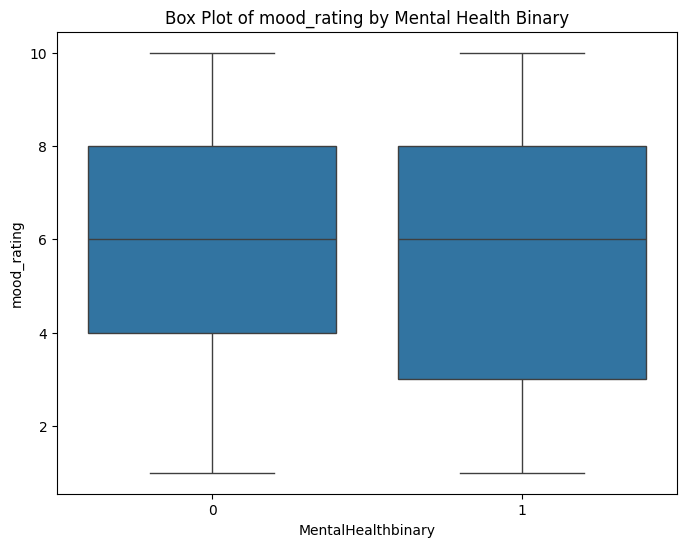

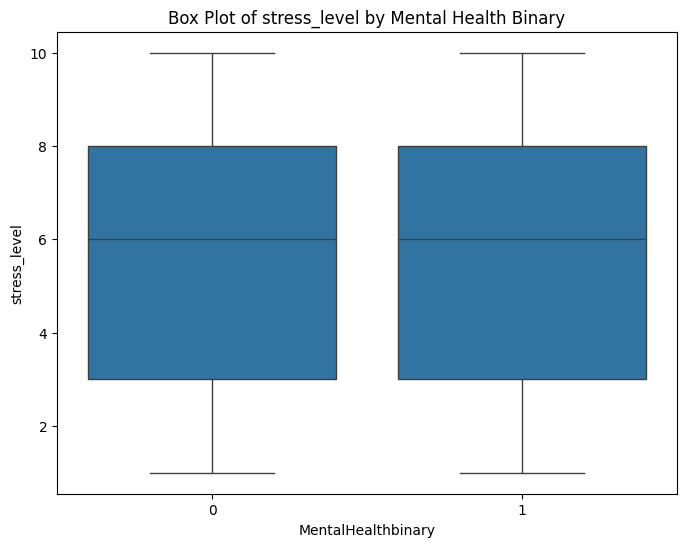

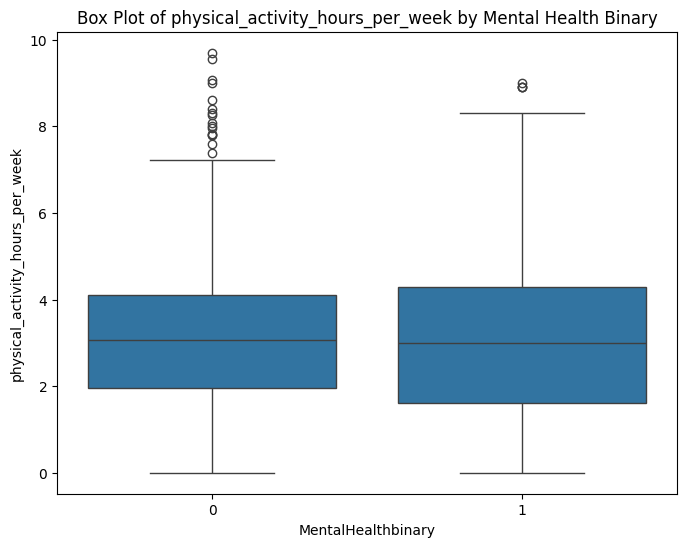

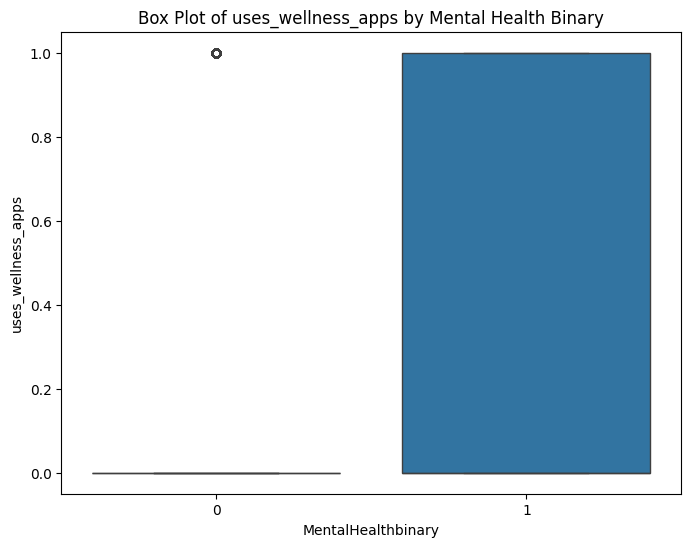

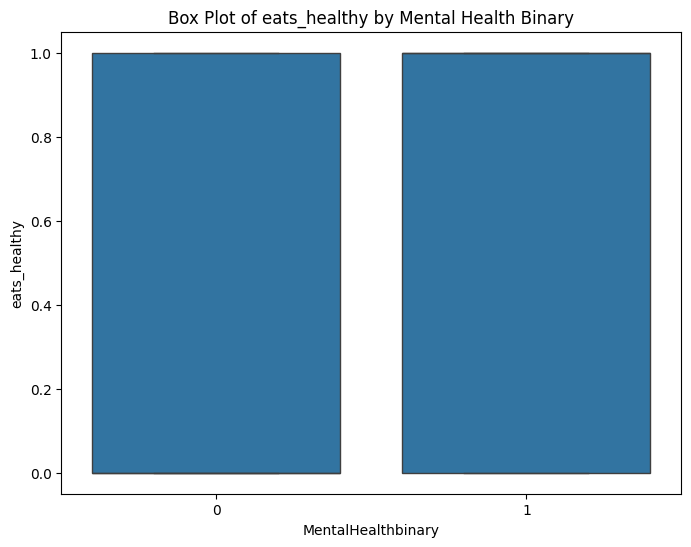

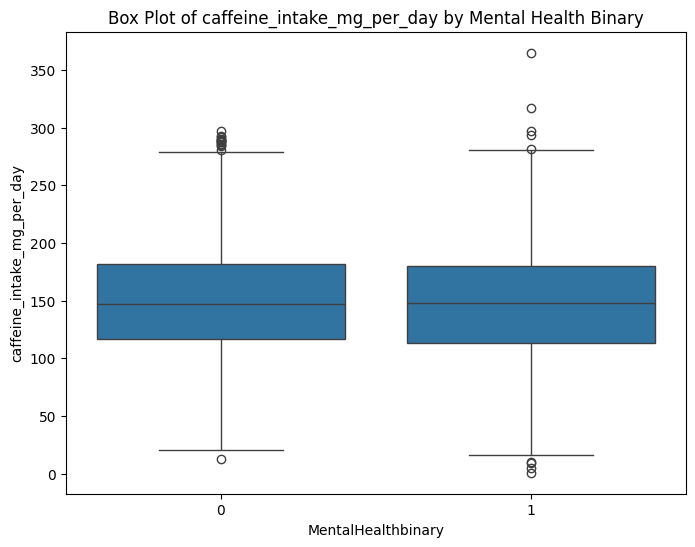

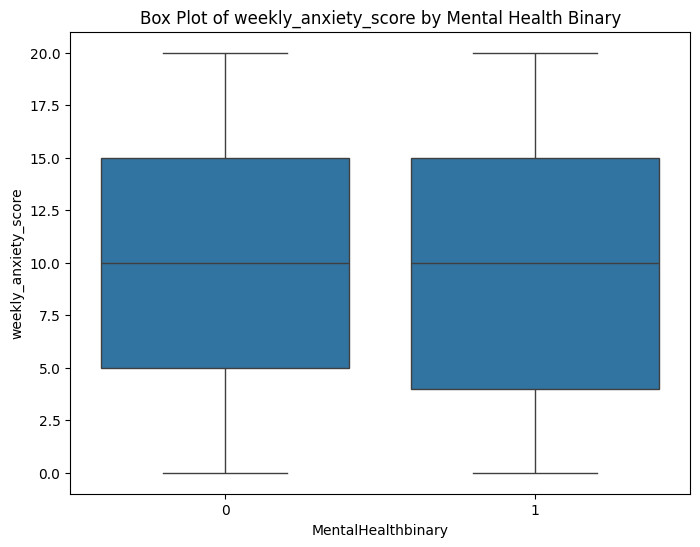

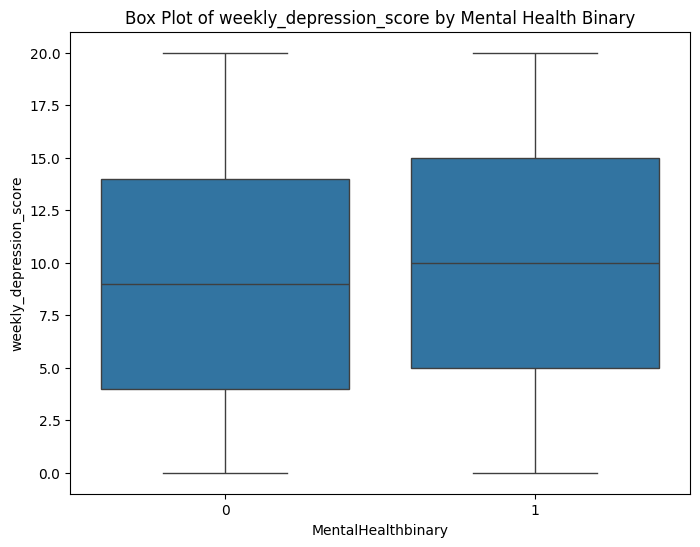

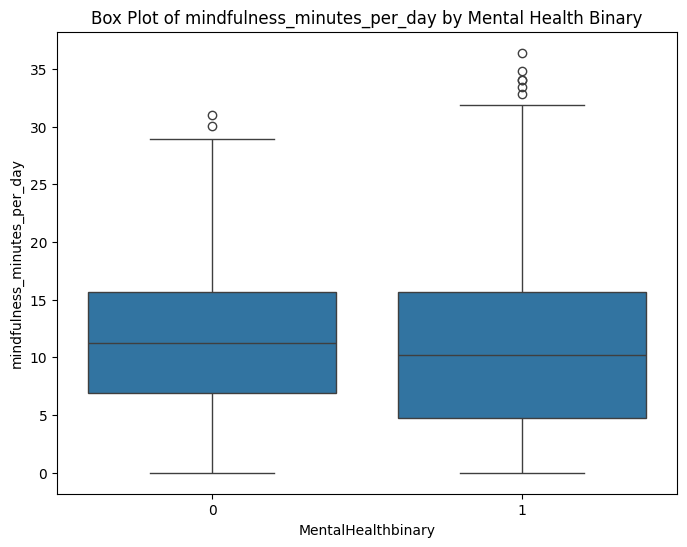

In [20]:
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='MentalHealthbinary', y=feature, data=df)
    plt.title(f'Box Plot of {feature} by Mental Health Binary')
    plt.show()


####here i use this function (your,s) (test preformance with and without it , with it is better )

In [21]:
def handle_outliers(df, numerical_columns=None, method='IQR', verbose=True):
    
  
    if numerical_columns is None:
        numerical_columns = df.select_dtypes(include=['number']).columns
    
    
    for col in numerical_columns:
        if col in df.columns:
            if method == 'IQR':
              
                Q1 = df[col].quantile(0.25)
                Q3 = df[col].quantile(0.75)
                IQR = Q3 - Q1
                lower_bound = Q1 - 1.5 * IQR
                upper_bound = Q3 + 1.5 * IQR
                
                
                outliers = ((df[col] < lower_bound) | (df[col] > upper_bound))
                num_outliers = outliers.sum()
                
               
                df.loc[df[col] < lower_bound, col] = lower_bound
                df.loc[df[col] > upper_bound, col] = upper_bound
                
                if verbose:
                    print(f"[INFO] Outliers handled in '{col}' using IQR:")
                    print(f"         - Number of Outliers: {num_outliers}")
                    print(f"         - Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
            
            elif method == 'Z-Score':
                
                mean = df[col].mean()
                std_dev = df[col].std()
                threshold = 3  
                
                
                outliers = ((df[col] < (mean - threshold * std_dev)) | (df[col] > (mean + threshold * std_dev)))
                num_outliers = outliers.sum()
                
                
                lower_bound = mean - threshold * std_dev
                upper_bound = mean + threshold * std_dev
                df.loc[df[col] < lower_bound, col] = lower_bound
                df.loc[df[col] > upper_bound, col] = upper_bound
                
                if verbose:
                    print(f"[INFO] Outliers handled in '{col}' using Z-Score:")
                    print(f"         - Number of Outliers: {num_outliers}")
                    print(f"         - Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    
    return df

In [22]:
df=handle_outliers(df)


[INFO] Outliers handled in 'age' using IQR:
         - Number of Outliers: 0
         - Lower Bound: -14.0, Upper Bound: 90.0
[INFO] Outliers handled in 'gender' using IQR:
         - Number of Outliers: 0
         - Lower Bound: -1.5, Upper Bound: 2.5
[INFO] Outliers handled in 'daily_screen_time_hours' using IQR:
         - Number of Outliers: 42
         - Lower Bound: 1.2541534733878783, Upper Bound: 10.709744211020203
[INFO] Outliers handled in 'phone_usage_hours' using IQR:
         - Number of Outliers: 18
         - Lower Bound: -0.8489767232787209, Upper Bound: 6.748294538797868
[INFO] Outliers handled in 'laptop_usage_hours' using IQR:
         - Number of Outliers: 15
         - Lower Bound: -0.6500000000000001, Upper Bound: 4.550000000000001
[INFO] Outliers handled in 'tablet_usage_hours' using IQR:
         - Number of Outliers: 5
         - Lower Bound: -0.20000000000000018, Upper Bound: 2.2
[INFO] Outliers handled in 'tv_usage_hours' using IQR:
         - Number of Outli

C:\Users\Admin\AppData\Local\Temp\ipykernel_6736\1736846019.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < lower_bound, col] = lower_bound
C:\Users\Admin\AppData\Local\Temp\ipykernel_6736\1736846019.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-4.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < lower_bound, col] = lower_bound
C:\Users\Admin\AppData\Local\Temp\ipykernel_6736\1736846019.py:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-4.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] < lower_bound,

In [23]:
df.head()
df['MentalHealthbinary']=df['MentalHealthbinary'].astype(int)

features engenering

In [24]:
df['screen']=df['daily_screen_time_hours']*df['phone_usage_hours']*df['laptop_usage_hours']*df['tablet_usage_hours']*df['tv_usage_hours']
df['sleep']=((df['sleep_duration_hours']*df['sleep_quality']))

df['heal']=(df['caffeine_intake_mg_per_day']*(df['eats_healthy']))
df['heal2']=(df['caffeine_intake_mg_per_day']*(df['uses_wellness_apps']))
df['screen']=df['daily_screen_time_hours']*df['phone_usage_hours']*df['laptop_usage_hours']*df['tablet_usage_hours']*df['tv_usage_hours']





In [25]:

dc_scaled = df.copy()

numeric_cols = dc_scaled.select_dtypes(include='number').columns.drop('MentalHealthbinary')

scaler = StandardScaler()

dc_scaled[numeric_cols] = scaler.fit_transform(dc_scaled[numeric_cols])

dc_scaled

,age,gender,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,entertainment_hours,gaming_hours,sleep_duration_hours,sleep_quality,mood_rating,stress_level,physical_activity_hours_per_week,uses_wellness_apps,eats_healthy,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day,MentalHealthbinary,screen,sleep,heal,heal2
0,0.853341,-0.862012,-0.674974,0.323620,-0.688903,1.330330,0.120504,1.939566,0.022753,-1.301488,0.500794,0.042000,0.233720,0.149960,1.634628,-1.360240,1.568740,1.184636,-0.493052,0.538281,0.896894,-1.008725,0,0.059525,0.228084,0.807716,1.169060
1,1.728662,0.781558,-1.181464,0.398203,-0.165124,-0.181752,0.569567,0.624099,1.073505,-1.301488,0.263573,-1.852584,0.605826,-0.214626,0.186943,0.694245,-0.637454,1.184636,0.026290,1.581248,1.407258,-0.642793,1,-0.096770,-0.199019,1.126528,-0.590789
2,0.180017,2.425127,2.532793,-0.645950,0.672924,-0.613775,0.794098,0.905985,0.786936,1.415041,0.500794,0.493091,1.350038,-0.214626,-0.174978,0.009417,-0.637454,-0.844141,0.799121,-0.504686,-1.144560,-0.584244,0,0.585966,1.509391,-0.776221,-0.590789
3,-0.762637,2.425127,1.576090,-2.212180,-2.050731,-0.613775,1.130894,1.187871,-0.359339,-1.038598,-1.041139,-1.311274,1.350038,1.608307,-0.174978,-1.759723,-0.637454,1.184636,-1.556467,-0.504686,-1.314681,-0.891627,0,-0.782045,0.560275,0.154912,-0.590789
4,1.122670,0.781558,-0.055931,-0.944280,-0.898415,1.114318,0.120504,-0.879291,1.551120,-1.476748,-0.566698,0.763746,-1.254705,0.879134,0.548864,-0.047652,1.568740,1.184636,1.409142,-0.330859,0.046289,-1.594217,1,-0.371754,-1.079588,1.975427,2.466456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3141,-1.031966,-0.862012,-1.261578,-0.073855,-0.729572,0.176574,-0.216292,-0.386266,-0.576233,0.190283,-1.046720,-0.981181,0.977932,-0.214626,1.272707,0.243063,-0.637454,-0.844141,1.356772,-1.547653,1.067016,-0.475581,0,-0.490323,0.445698,-0.776221,-0.590789
3142,-0.897302,0.781558,-0.069611,-1.310308,0.648427,-0.607795,-0.270871,1.086971,0.903916,0.125936,1.125960,0.537784,-0.138387,-0.214626,1.634628,-0.564960,-0.637454,-0.844141,-0.468163,-0.852342,-0.804317,-0.187505,0,-0.532581,0.024957,-0.776221,-0.590789
3143,-0.627972,2.425127,0.047262,0.538485,-0.852276,-1.551120,0.333682,0.143099,1.858725,-1.656733,-1.332733,1.021018,0.605826,0.879134,0.910786,-1.178516,-0.637454,-0.844141,-0.153117,1.407420,1.237137,-1.561982,0,-0.592639,0.976629,-0.776221,-0.590789
3144,1.324668,-0.862012,-1.034878,0.075596,0.504829,1.521229,-1.174465,0.289771,-0.608141,-0.665657,-0.155699,-0.560151,0.605826,0.149960,0.548864,-0.591805,-0.637454,-0.844141,-1.565334,-0.330859,-0.804317,-0.975365,0,-0.418367,0.329741,-0.776221,-0.590789


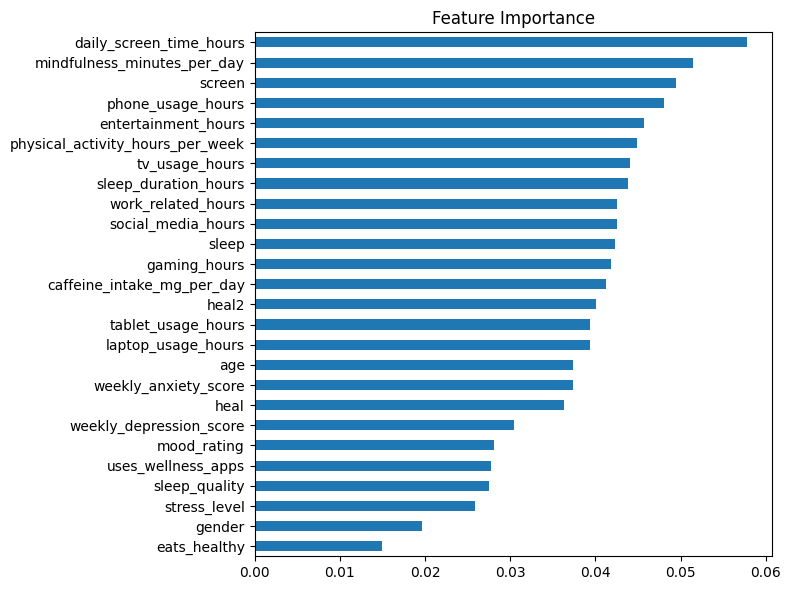

daily_screen_time_hours             0.057822
mindfulness_minutes_per_day         0.051494
screen                              0.049487
phone_usage_hours                   0.048012
entertainment_hours                 0.045719
physical_activity_hours_per_week    0.044931
tv_usage_hours                      0.044027
sleep_duration_hours                0.043843
work_related_hours                  0.042556
social_media_hours                  0.042549
sleep                               0.042346
gaming_hours                        0.041878
caffeine_intake_mg_per_day          0.041267
heal2                               0.040009
tablet_usage_hours                  0.039394
laptop_usage_hours                  0.039357
age                                 0.037368
weekly_anxiety_score                0.037349
heal                                0.036248
weekly_depression_score             0.030436
mood_rating                         0.028144
uses_wellness_apps                  0.027716
sleep_qual

In [26]:
features = df.drop(columns=['MentalHealthbinary'])
features = pd.get_dummies(features)
target = df['MentalHealthbinary']

model = RandomForestClassifier(random_state=42)
model.fit(features, target)

importances = pd.Series(model.feature_importances_, index=features.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title("Feature Importance")
plt.tight_layout()
plt.show()
print(importances.sort_values(ascending=False))


In [27]:

dc_scaled

,age,gender,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,entertainment_hours,gaming_hours,sleep_duration_hours,sleep_quality,mood_rating,stress_level,physical_activity_hours_per_week,uses_wellness_apps,eats_healthy,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day,MentalHealthbinary,screen,sleep,heal,heal2
0,0.853341,-0.862012,-0.674974,0.323620,-0.688903,1.330330,0.120504,1.939566,0.022753,-1.301488,0.500794,0.042000,0.233720,0.149960,1.634628,-1.360240,1.568740,1.184636,-0.493052,0.538281,0.896894,-1.008725,0,0.059525,0.228084,0.807716,1.169060
1,1.728662,0.781558,-1.181464,0.398203,-0.165124,-0.181752,0.569567,0.624099,1.073505,-1.301488,0.263573,-1.852584,0.605826,-0.214626,0.186943,0.694245,-0.637454,1.184636,0.026290,1.581248,1.407258,-0.642793,1,-0.096770,-0.199019,1.126528,-0.590789
2,0.180017,2.425127,2.532793,-0.645950,0.672924,-0.613775,0.794098,0.905985,0.786936,1.415041,0.500794,0.493091,1.350038,-0.214626,-0.174978,0.009417,-0.637454,-0.844141,0.799121,-0.504686,-1.144560,-0.584244,0,0.585966,1.509391,-0.776221,-0.590789
3,-0.762637,2.425127,1.576090,-2.212180,-2.050731,-0.613775,1.130894,1.187871,-0.359339,-1.038598,-1.041139,-1.311274,1.350038,1.608307,-0.174978,-1.759723,-0.637454,1.184636,-1.556467,-0.504686,-1.314681,-0.891627,0,-0.782045,0.560275,0.154912,-0.590789
4,1.122670,0.781558,-0.055931,-0.944280,-0.898415,1.114318,0.120504,-0.879291,1.551120,-1.476748,-0.566698,0.763746,-1.254705,0.879134,0.548864,-0.047652,1.568740,1.184636,1.409142,-0.330859,0.046289,-1.594217,1,-0.371754,-1.079588,1.975427,2.466456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3141,-1.031966,-0.862012,-1.261578,-0.073855,-0.729572,0.176574,-0.216292,-0.386266,-0.576233,0.190283,-1.046720,-0.981181,0.977932,-0.214626,1.272707,0.243063,-0.637454,-0.844141,1.356772,-1.547653,1.067016,-0.475581,0,-0.490323,0.445698,-0.776221,-0.590789
3142,-0.897302,0.781558,-0.069611,-1.310308,0.648427,-0.607795,-0.270871,1.086971,0.903916,0.125936,1.125960,0.537784,-0.138387,-0.214626,1.634628,-0.564960,-0.637454,-0.844141,-0.468163,-0.852342,-0.804317,-0.187505,0,-0.532581,0.024957,-0.776221,-0.590789
3143,-0.627972,2.425127,0.047262,0.538485,-0.852276,-1.551120,0.333682,0.143099,1.858725,-1.656733,-1.332733,1.021018,0.605826,0.879134,0.910786,-1.178516,-0.637454,-0.844141,-0.153117,1.407420,1.237137,-1.561982,0,-0.592639,0.976629,-0.776221,-0.590789
3144,1.324668,-0.862012,-1.034878,0.075596,0.504829,1.521229,-1.174465,0.289771,-0.608141,-0.665657,-0.155699,-0.560151,0.605826,0.149960,0.548864,-0.591805,-0.637454,-0.844141,-1.565334,-0.330859,-0.804317,-0.975365,0,-0.418367,0.329741,-0.776221,-0.590789


In [28]:

X = dc_scaled.drop(['MentalHealthbinary'], axis=1)
X = pd.get_dummies(X)
y = dc_scaled['MentalHealthbinary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
random_model = RandomForestClassifier(n_estimators=500, max_depth=15, random_state=42)
random_model.fit(X_train, y_train)


y_pred = random_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8063492063492064

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       302
           1       0.83      0.79      0.81       328

    accuracy                           0.81       630
   macro avg       0.81      0.81      0.81       630
weighted avg       0.81      0.81      0.81       630


Confusion Matrix:
[[249  53]
 [ 69 259]]


Test Accuracy: 0.6825396825396826
Test F1 Score: 0.5815899581589958
Test Precision: 0.9266666666666666
Test Recall: 0.42378048780487804
Test ROC-AUC: 0.6936783233726378


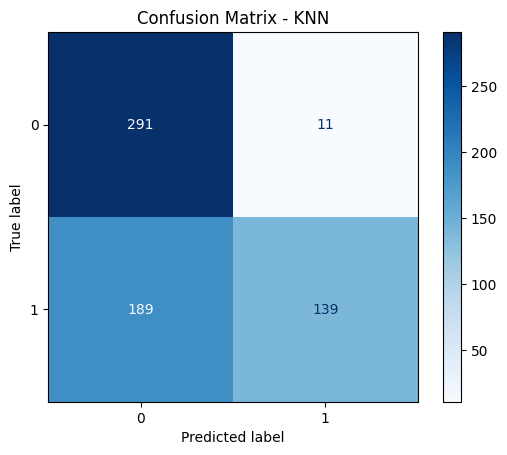

In [30]:


model = KNeighborsClassifier(n_neighbors=3 ,p=1)  
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy}")
print(f"Test F1 Score: {test_f1}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test ROC-AUC: {test_roc_auc}")

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - KNN")
plt.show()


Test Accuracy: 0.8222222222222222
Test F1 Score: 0.8175895765472313
Test Precision: 0.8776223776223776
Test Recall: 0.7652439024390244
Test ROC-AUC: 0.906335810046842


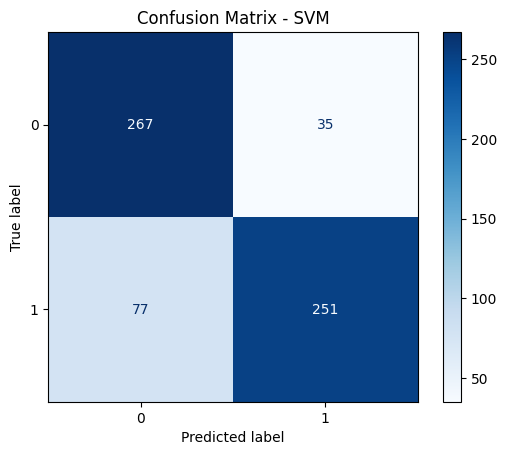

In [31]:


model = SVC(kernel='rbf', gamma='scale', C=20, probability=True)  
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)

test_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f"Test Accuracy: {test_accuracy}")
print(f"Test F1 Score: {test_f1}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test ROC-AUC: {test_roc_auc}")

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.show()


In [32]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(n_estimators=500, learning_rate=0.06, depth=6, random_state=0, verbose=0)
cat_model.fit(X_train, y_train)

y_pred_cat = cat_model.predict(X_test)



test_accuracy = accuracy_score(y_test, y_pred_cat)
test_f1 = f1_score(y_test, y_pred_cat)
test_precision = precision_score(y_test, y_pred_cat)
test_recall = recall_score(y_test, y_pred_cat)
test_roc_auc = roc_auc_score(y_test, y_pred_cat)

print(f"Test Accuracy: {test_accuracy}")
print(f"Test F1 Score: {test_f1}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test ROC-AUC: {test_roc_auc}")

Test Accuracy: 0.8444444444444444
Test F1 Score: 0.8515151515151516
Test Precision: 0.8463855421686747
Test Recall: 0.8567073170731707
Test ROC-AUC: 0.8439165724438701


[LightGBM] [Info] Number of positive: 1245, number of negative: 1271
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000629 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4442
[LightGBM] [Info] Number of data points in the train set: 2516, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494833 -> initscore=-0.020668
[LightGBM] [Info] Start training from score -0.020668
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Test Accuracy: 0.861904761904762
Test F1 Score: 0.8687782805429864
Test Precision: 0.8597014925373134
Test Recall: 0.8780487804878049


Text(0.5, 1.0, 'Confusion Matrix - light gbm')

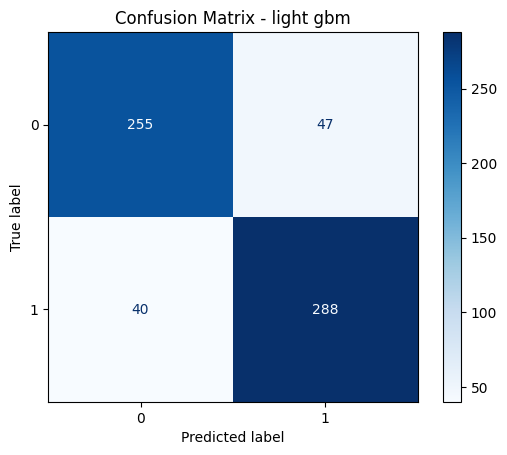

In [34]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(n_estimators=500, learning_rate=0.1, max_depth=12, subsample=0.2, colsample_bytree=0.6, random_state=42)
lgb_model.fit(X_train, y_train)


y_pred_lg =  lgb_model.predict(X_test)



test_accuracy = accuracy_score(y_test, y_pred_lg)
test_f1 = f1_score(y_test, y_pred_lg)
test_precision = precision_score(y_test, y_pred_lg)
test_recall = recall_score(y_test, y_pred_lg)
test_roc_auc = roc_auc_score(y_test, y_pred_lg)

print(f"Test Accuracy: {test_accuracy}")
print(f"Test F1 Score: {test_f1}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")

cm = confusion_matrix(y_test, y_pred_lg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lgb_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - light gbm")


In [36]:

XGB = XGBClassifier(n_estimators=600, learning_rate=0.1, max_depth=15, subsample=0.9, colsample_bytree=0.9, random_state=42)
XGB.fit(X_train, y_train)


y_pred_xg=  XGB.predict(X_test)



test_accuracy = accuracy_score(y_test, y_pred_xg)
test_f1 = f1_score(y_test, y_pred_xg)
test_precision = precision_score(y_test, y_pred_xg)
test_recall = recall_score(y_test, y_pred_xg)
test_roc_auc = roc_auc_score(y_test, y_pred_xg)

print(f"Test Accuracy: {test_accuracy}")
print(f"Test F1 Score: {test_f1}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")


Test Accuracy: 0.846031746031746
Test F1 Score: 0.8519083969465648
Test Precision: 0.8532110091743119
Test Recall: 0.850609756097561


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [01:38:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 600, 'subsample': 0.9}


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:183: UserWarning: [01:38:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Test Accuracy: 0.8492063492063492
Test F1 Score: 0.8562783661119516
Test Precision: 0.8498498498498499
Test Recall: 0.8628048780487805
Test ROC-AUC: 0.848620982070748


Text(0.5, 1.0, 'Confusion Matrix - XGBoost')

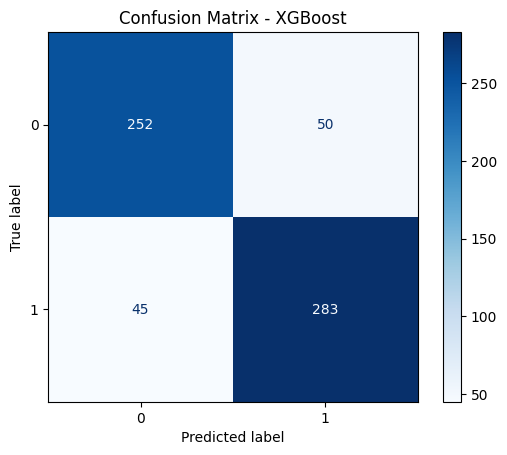

In [37]:

model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

param_grid = {
    'max_depth': [13,15],  
    'learning_rate': [0.1], 
    'n_estimators': [500,600],  
    'subsample': [ 0.9,1],  
    'colsample_bytree': [0.7, 0.8, 0.9]  
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=7)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

y_test_pred = best_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy}")
print(f"Test F1 Score: {test_f1}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test ROC-AUC: {test_roc_auc}")
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - XGBoost")


in a moment i use chat gpt to see the correct syntax of the code but i dont use the full code result of chat gpt , i own  some codes from previous file

we see that the best performance is for light gbm model (accurracy and f1 )An F1-score of 86.88% indicates a good balance between precision and recall 
The model was trained on a dataset with 1245 positive and 1271 negative cases. It achieved an accuracy of 0.8619, F1 score of 0.8678, precision of 0.8597, and recall of 0.8780. The confusion matrix shows 255 true negatives, 47 false positives, 40 false negatives, and 288 true positives, indicating good performance with a slight tendency to over-predict positives.